# Build and Train Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import TensorBoard

In [32]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [33]:
model = Sequential()
model.add(Input(shape=(30, 258))) 
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [34]:
res = [.7, 0.2, 0.1]

In [35]:
actions[np.argmax(res)]

'Halo'

In [36]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [37]:

history = model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback], validation_data=(X_test, y_test))


Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - categorical_accuracy: 0.1952 - loss: 1.8217 - val_categorical_accuracy: 0.1250 - val_loss: 1.5750
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2512 - loss: 1.6080 - val_categorical_accuracy: 0.6250 - val_loss: 1.5501
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.3247 - loss: 1.5925 - val_categorical_accuracy: 0.5000 - val_loss: 1.4481
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2838 - loss: 1.5135 - val_categorical_accuracy: 0.3750 - val_loss: 1.3141
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.3533 - loss: 1.4536 - val_categorical_accuracy: 0.6250 - val_loss: 1.2749
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.4692 - loss: 1.3802 - val_categorical_accuracy: 0.7500 - val_loss: 0.9500
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.5080 - loss: 1.1

In [38]:
# Ekstrak data
categorical_accuracy = history.history['categorical_accuracy']
val_categorical_accuracy = history.history['val_categorical_accuracy']

# Cetak akurasi kategorikal dan akurasi kategorikal validasi untuk setiap epoch
for epoch, (cat_acc, val_cat_acc) in enumerate(zip(categorical_accuracy, val_categorical_accuracy), 1):
    print(f'Epoch {epoch}/{len(categorical_accuracy)} - categorical_accuracy: {cat_acc:.4f} - val_categorical_accuracy: {val_cat_acc:.4f}')


Epoch 1/1000 - categorical_accuracy: 0.2042 - val_categorical_accuracy: 0.1250
Epoch 2/1000 - categorical_accuracy: 0.2887 - val_categorical_accuracy: 0.6250
Epoch 3/1000 - categorical_accuracy: 0.3451 - val_categorical_accuracy: 0.5000
Epoch 4/1000 - categorical_accuracy: 0.3239 - val_categorical_accuracy: 0.3750
Epoch 5/1000 - categorical_accuracy: 0.3803 - val_categorical_accuracy: 0.6250
Epoch 6/1000 - categorical_accuracy: 0.5000 - val_categorical_accuracy: 0.7500
Epoch 7/1000 - categorical_accuracy: 0.5070 - val_categorical_accuracy: 0.8750
Epoch 8/1000 - categorical_accuracy: 0.5915 - val_categorical_accuracy: 1.0000
Epoch 9/1000 - categorical_accuracy: 0.5775 - val_categorical_accuracy: 0.6250
Epoch 10/1000 - categorical_accuracy: 0.6056 - val_categorical_accuracy: 0.6250
Epoch 11/1000 - categorical_accuracy: 0.4577 - val_categorical_accuracy: 0.5000
Epoch 12/1000 - categorical_accuracy: 0.4718 - val_categorical_accuracy: 0.6250
Epoch 13/1000 - categorical_accuracy: 0.5211 - va

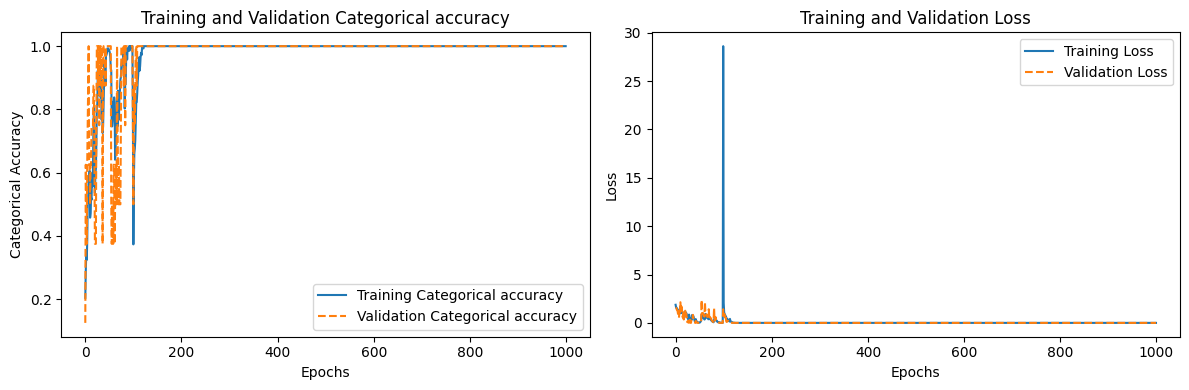

In [39]:
# Membuat subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Mendefinisikan label plot dan gaya
plot_labels = ['Categorical Accuracy', 'Loss']
plot_styles = ['-', '--']

# Plot akurasi dan loss pelatihan dan pengujian
for i, metric in enumerate(['categorical_accuracy', 'loss']):
    train_metric = history.history[metric]
    val_metric = history.history['val_' + metric]
    axs[i].plot(train_metric, label='Training ' + metric.replace('_', ' ').capitalize(), linestyle=plot_styles[0])
    axs[i].plot(val_metric, label='Validation ' + metric.replace('_', ' ').capitalize(), linestyle=plot_styles[1])
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(plot_labels[i])
    axs[i].set_title(f'Training and Validation {metric.replace("_", " ").capitalize()}')
    axs[i].legend()

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        82,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 711,953 (2.72 MB)

 Trainable params: 237,317 (927.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 474,636 (1.81 MB)